### Libraries

In [37]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load Data

In [38]:
df = pd.read_csv('../data/Daily_Demand_Forecasting_Orders.csv',delimiter=';', parse_dates=True)
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


### Data Cleaning

In [39]:
missing_values = df.isnull().sum()
print("Missing values in each column:", missing_values)

Missing values in each column: Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64


### Data Preprocessing

In [40]:
X = df.drop(columns=['Target (Total orders)','Week of the month (first week, second, third, fourth or fifth week','Day of the week (Monday to Friday)'])
y = df['Target (Total orders)'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=36)

#### Linear Regression

In [41]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Absolute Error: {mae}")
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R^2 Score: {r2}")

Linear Regression - Mean Absolute Error: 4.500103993147301e-14
Linear Regression - Mean Squared Error: 3.1638581372064046e-27
Linear Regression - R^2 Score: 1.0


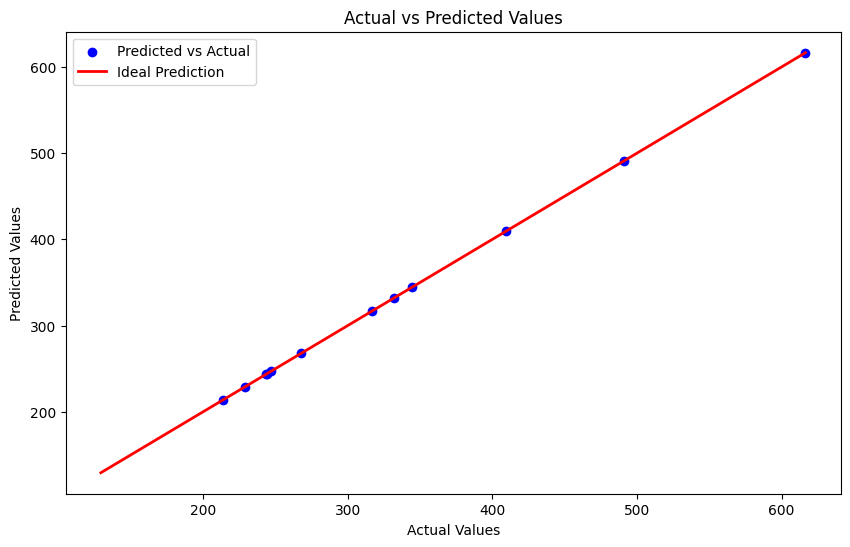

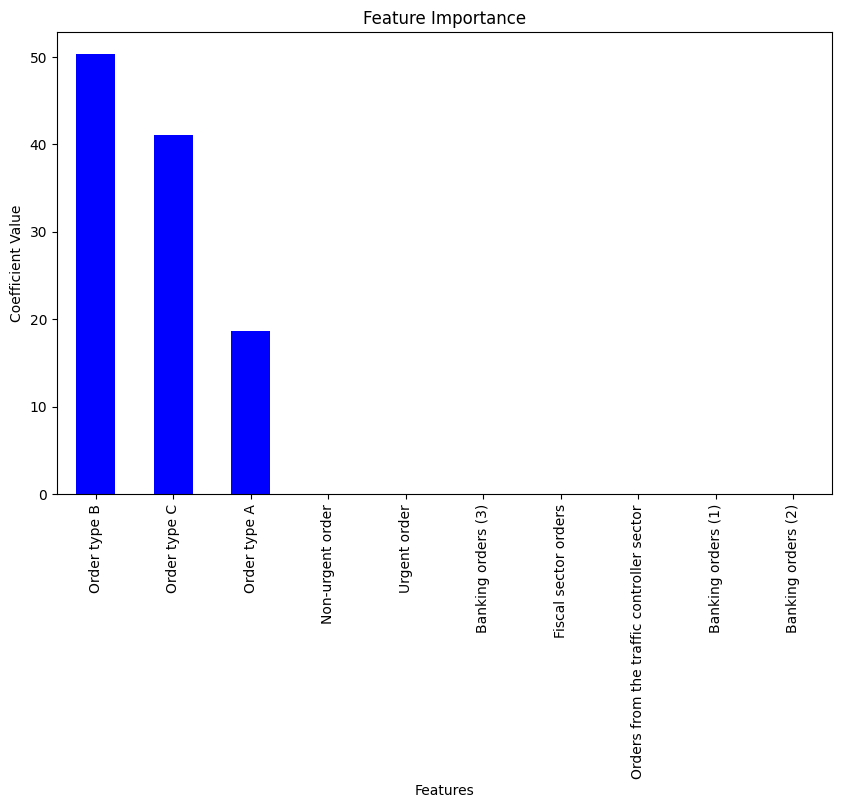

In [42]:
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
# Visualizing the feature importance
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='blue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

### Polynomial Regression

In [43]:
# Model Training
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Model Prediction
y_pred_poly = poly_model.predict(X_test_poly)

# Model Evaluation for Polynomial Regression
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"Polynomial Regression - Mean Absolute Error: {mae_poly}")
print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R^2 Score: {r2_poly}")

Polynomial Regression - Mean Absolute Error: 9.19457310235146
Polynomial Regression - Mean Squared Error: 176.3990455035439
Polynomial Regression - R^2 Score: 0.9827657765898385


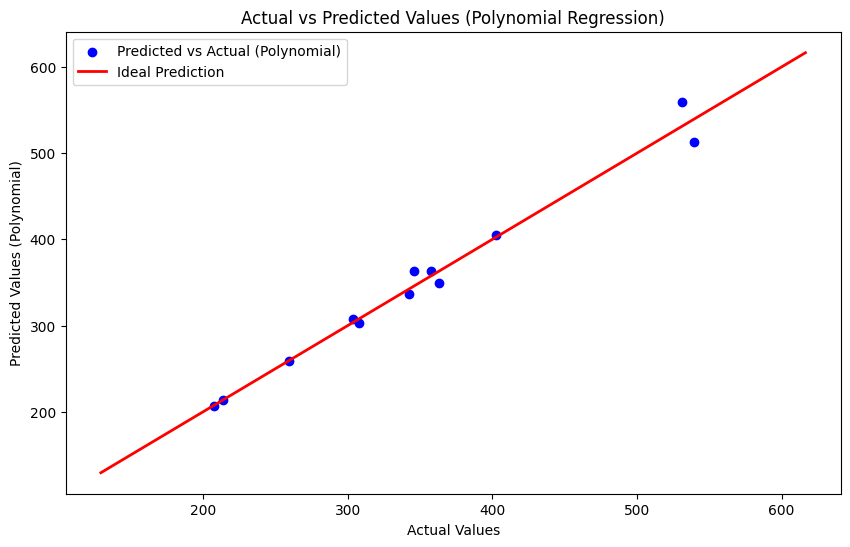

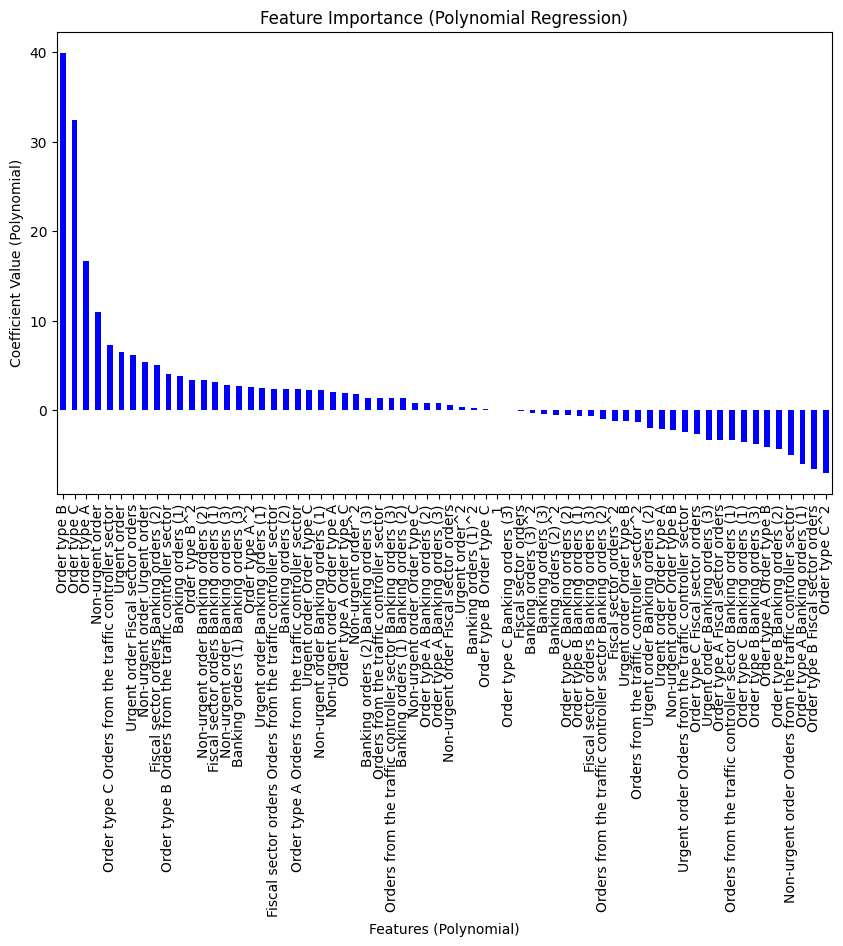

In [44]:
# Visualizing the polynomial regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_poly, y_pred_poly, color='blue', label='Predicted vs Actual (Polynomial)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Polynomial)')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.legend()
plt.show()
# Visualizing the feature importance for polynomial regression
feature_importance_poly = pd.Series(poly_model.coef_, index=poly.get_feature_names_out(X.columns)).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_poly.plot(kind='bar', color='blue')
plt.title('Feature Importance (Polynomial Regression)')
plt.xlabel('Features (Polynomial)')
plt.ylabel('Coefficient Value (Polynomial)')
plt.show()

### Save Model

In [45]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
joblib.dump(poly_model, 'polynomial_regression_model.pkl')

['polynomial_regression_model.pkl']

In [46]:
# Making predictions with the model
y_pred = model.predict(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

In [47]:
# Saving the predictions
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted (Linear)': y_pred,
    'Predicted (Polynomial)': y_pred_poly
})
predictions
#predictions.to_csv('predictions.csv', index=False)

,Actual,Predicted (Linear),Predicted (Polynomial)
0,331.900,331.900,512.879784
1,316.849,316.849,207.185339
2,244.235,244.235,558.997094
3,229.249,229.249,363.247421
4,490.790,490.790,349.148744
5,268.002,268.002,213.291717
6,246.992,246.992,363.199462
7,616.453,616.453,405.357334
8,243.568,243.568,303.046504
9,213.509,213.509,307.733143
